<a href="https://colab.research.google.com/github/YoofKhaneja/Heart_Disease_Prediction/blob/master/ICodes/Imputed_NN_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing standard libraries

In [0]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# Seeding values
### This is done so that code values stay uniform

In [0]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(0)

# Reading the data into a dataframe

In [3]:
url = 'https://raw.githubusercontent.com/YoofKhaneja/Heart_Disease_Prediction/master/Codes/framingham.csv'
hd = pd.read_csv(url)
hd.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# Data exploration

In [4]:
print('Total patients: ', hd.shape[0])
print('Total attributes: ', hd.shape[1] - 1)
print('Number of labels: ', 1, '(', hd.columns[15], ')')

Total patients:  4240
Total attributes:  15
Number of labels:  1 ( TenYearCHD )


In [5]:
hd.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


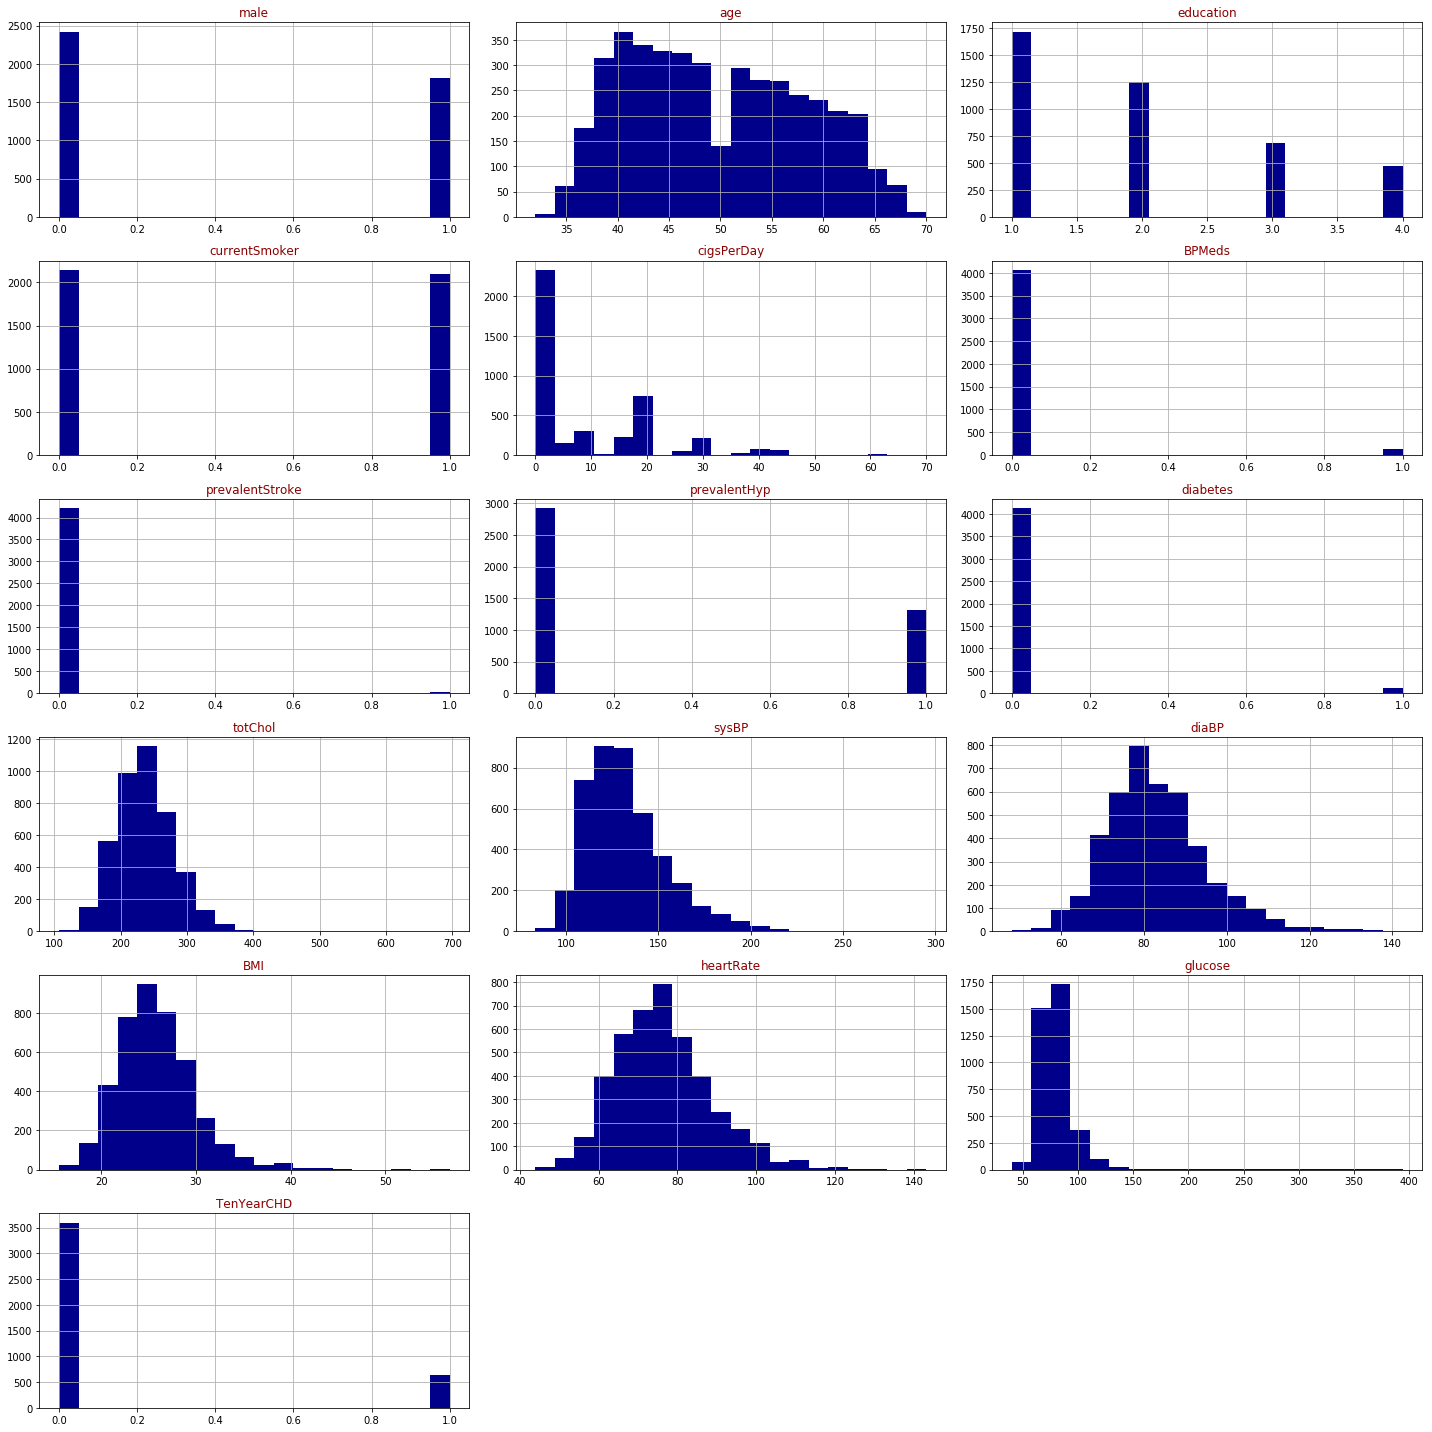

In [6]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'DarkBlue')
        ax.set_title(feature, color = 'DarkRed')
    fig.tight_layout()  
    plt.show()
draw_histograms(hd, hd.columns, 6, 3)

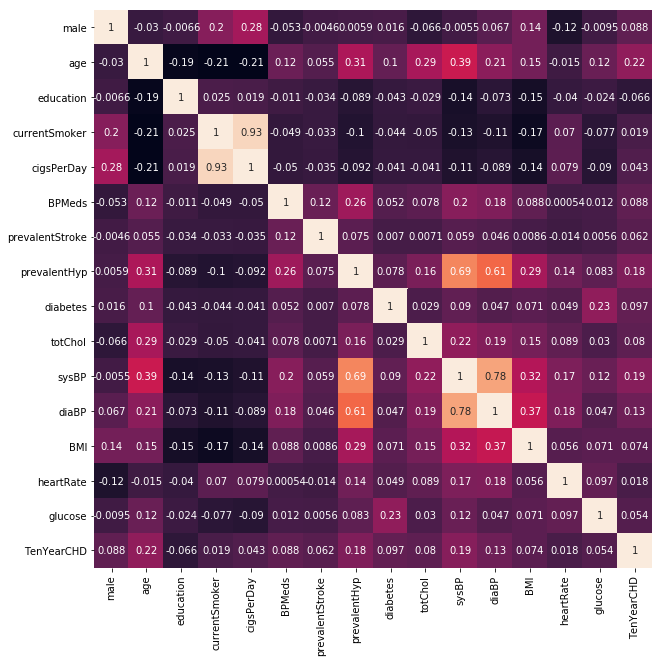

In [7]:
corr = hd.corr(method = 'spearman')
plt.figure(figsize = (10, 16))
sns.heatmap(corr, square = True, cbar = False, annot = True)

Total patients at risk of CHD:  644
Total patients not at risk of CHD:  3596


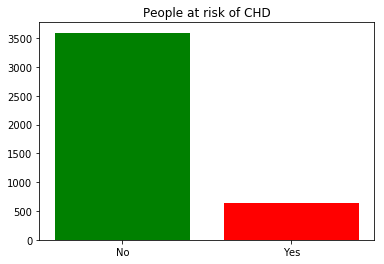

In [8]:
from collections import Counter
chdc = Counter(hd['TenYearCHD'])
print('Total patients at risk of CHD: ', chdc[1])
print('Total patients not at risk of CHD: ', chdc[0])
plt.bar(list(chdc.keys()), chdc.values(), color = ['g', 'r'])
plt.xticks(list(chdc.keys()), ['No', 'Yes'])
plt.title('People at risk of CHD')
plt.show()

In [9]:
print('Missing values: ')
print(hd.isnull().sum())
mv = np.array(hd.isnull().sum())
ta = 0
for t in mv:
    ta += t
print('\nTotal missing attributes: ', ta)
tr = 0
for i in hd.isnull().sum(axis = 1):
    if i > 0:
        tr += 1
print('\nTotal rows with missing data: ', tr)

Missing values: 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Total missing attributes:  645

Total rows with missing data:  582


# Dropping irrelevant columns and rows with missing data

In [0]:
hd.drop(['education'], axis = 1, inplace = True)

# Imputing missing values using various techniques

In [11]:
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler
hd_i = pd.DataFrame(IterativeImputer().fit_transform(hd))
hd_i.columns = hd.columns
#hd_ii = pd.DataFrame(KNN(k = 5).fit_transform(hd))
#hd_ii.columns = hd.columns
#hd_iii = pd.DataFrame(NuclearNormMinimization().fit_transform(hd))
#hd_iii.columns = hd.columns
#hd_iv = pd.DataFrame(SoftImpute().fit_transform(hd))
#hd_iv.columns = hd.columns
#hd_v = pd.DataFrame(BiScaler().fit_transform(hd))
#hd_v.columns = hd.columns

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [12]:
hd_i.head(20)
#hd_ii.head(20)
#hd_iii.head(20)
#hd_iv.head(20)
#hd_v.head(20)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
5,0.0,43.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.000000,0.0
6,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.000000,1.0
7,0.0,45.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.000000,0.0
8,1.0,52.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.000000,0.0
9,1.0,43.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.000000,0.0


# Creating the training and testing data

In [13]:
hd_ = hd_i.copy(deep = True)
hd_['age'] = pd.cut(hd_['age'], 
                    5, 
                    labels = [1, 2, 3, 4, 5])
hd_['cigsPerDay'] = pd.cut(hd_['cigsPerDay'], 
                           6, 
                           labels = [1, 2, 3, 4, 5, 6])
hd_['totChol'] = pd.cut(hd_['totChol'], 
                        13, 
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
hd_['sysBP'] = pd.cut(hd_['sysBP'], 
                      10, 
                      labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_['diaBP'] = pd.cut(hd_['diaBP'], 
                      8, 
                      labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_['BMI'] = pd.cut(hd_['BMI'], 
                    10, 
                    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_['heartRate'] = pd.cut(hd_['heartRate'], 
                          8, 
                          labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_['glucose'] = pd.cut(hd_['glucose'], 
                        15, 
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
hd_['age'] = hd_['age'].apply(lambda x: x*0.2)
hd_['cigsPerDay'] = hd_['cigsPerDay'].apply(lambda x: round(x*0.16, 2))
hd_['totChol'] = hd_['totChol'].apply(lambda x: round(x*0.077, 2))
hd_['sysBP'] = hd_['sysBP'].apply(lambda x: round(x*0.1, 2))
hd_['diaBP'] = hd_['diaBP'].apply(lambda x: round(x*0.125, 2))
hd_['BMI'] = hd_['BMI'].apply(lambda x: round(x*0.1, 2))
hd_['heartRate'] = hd_['heartRate'].apply(lambda x: round(x*0.125, 2))
hd_['glucose'] = hd_['glucose'].apply(lambda x: round(x*0.067, 2))
hd_['BPMeds'] = hd_['BPMeds'].apply(lambda x: int(x))
hd_.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.2,0.0,0.16,0,0.0,0.0,0.0,0.15,0.2,0.25,0.3,0.38,0.13,0.0
1,0.0,0.4,0.0,0.16,0,0.0,0.0,0.0,0.31,0.2,0.38,0.4,0.62,0.13,0.0
2,1.0,0.6,1.0,0.32,0,0.0,0.0,0.0,0.31,0.3,0.38,0.3,0.38,0.13,0.0
3,0.0,0.8,1.0,0.48,0,0.0,1.0,0.0,0.23,0.4,0.50,0.4,0.25,0.20,1.0
4,0.0,0.4,1.0,0.32,0,0.0,0.0,0.0,0.31,0.3,0.50,0.2,0.50,0.13,0.0
5,0.0,0.4,0.0,0.16,0,0.0,1.0,0.0,0.23,0.5,0.75,0.4,0.38,0.20,0.0
6,0.0,1.0,0.0,0.16,0,0.0,0.0,0.0,0.23,0.3,0.25,0.5,0.25,0.13,1.0
7,0.0,0.4,1.0,0.32,0,0.0,0.0,0.0,0.39,0.1,0.25,0.2,0.38,0.13,0.0
8,1.0,0.6,0.0,0.16,0,0.0,1.0,0.0,0.31,0.3,0.50,0.3,0.38,0.13,0.0
9,1.0,0.4,1.0,0.48,0,0.0,1.0,0.0,0.23,0.4,0.62,0.2,0.50,0.20,0.0


In [0]:
attrib = hd_.iloc[:, :-1]
lab = hd_.iloc[:, -1]
hdy = hd_[hd_['TenYearCHD'] == 1]
hdn = hd_[hd_['TenYearCHD'] == 0]

In [0]:
hdy = hdy.sample(frac = 1).reset_index(drop = True)
hdn = hdn.sample(frac = 1).reset_index(drop = True)
sample_y = hdy.iloc[:550]
sample_n = hdn.iloc[:800]
train_data = pd.concat([sample_y, sample_n])
train_data = train_data.sample(frac = 1).reset_index(drop = True)
x_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

In [0]:
hdy = hdy.sample(frac = 1).reset_index(drop = True)
hdn = hdn.sample(frac = 1).reset_index(drop = True)
sample_y = hdy.iloc[:100]
sample_n = hdn.iloc[:175]
test_data = pd.concat([sample_y, sample_n])
test_data = test_data.sample(frac = 1).reset_index(drop = True)
x_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Creating and compiling the neural network model
### The model contains two hidden layers, each with 200 neurons. Dropout and regularization are applied to ensure that there is no overfitting

In [17]:
from keras import Sequential, regularizers
from keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(200, input_dim = 14,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01))) 
                #kernel_regularizer = regularizers.l1(0.01)))
                #bias_regularizer = regularizers.l1(0.01)))
model.add(Dropout(0.2))
model.add(Activation('relu', name = 'A1'))
model.add(Dense(200,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01)))
                #kernel_regularizer = regularizers.l1(0.01))) 
                #bias_regularizer = regularizers.l1(0.01)))
model.add(Dropout(0.2))
model.add(Activation('relu', name = 'A2'))
model.add(Dense(1,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01)))
                #kernel_regularizer = regularizers.l1(0.001))) 
                #bias_regularizer = regularizers.l1(0.001)))
model.add(Dropout(0.2))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
model.compile(optimizer = 'Adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               3000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
A1 (Activation)              (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
A2 (Activation)              (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
__________

# Defining functions to better understand the training process
### One function prints the average accuracy and loss, the other plots the values for loss and accuracy accross a training session


In [0]:
def stats_avg(history, i):
    val_acc = np.array(history.history['val_acc'])
    val_loss = np.array(history.history['val_loss'])
    model_acc = np.array(history.history['acc'])
    model_loss = np.array(history.history['loss'])
    print('Average validation loss:', val_loss.sum()/i)
    print('Average validation accuracy:', val_acc.sum()/i)
    print('Average loss:', model_loss.sum()/i)
    print('Average accuracy:', model_acc.sum()/i)

In [0]:
def plots(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Training the model

Instructions for updating:
Use tf.cast instead.
Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 3s 3ms/step - loss: 39.6998 - acc: 0.4615 - val_loss: 24.9739 - val_acc: 0.3905
Epoch 2/50
1012/1012 [==============================] - 0s 196us/step - loss: 21.7845 - acc: 0.3953 - val_loss: 15.9892 - val_acc: 0.3609
Epoch 3/50
1012/1012 [==============================] - 0s 192us/step - loss: 15.7793 - acc: 0.3883 - val_loss: 13.4399 - val_acc: 0.3609
Epoch 4/50
1012/1012 [==============================] - 0s 204us/step - loss: 13.8882 - acc: 0.4091 - val_loss: 12.4758 - val_acc: 0.3728
Epoch 5/50
1012/1012 [==============================] - 0s 196us/step - loss: 13.1364 - acc: 0.3953 - val_loss: 12.0379 - val_acc: 0.3728
Epoch 6/50
1012/1012 [==============================] - 0s 195us/step - loss: 12.6928 - acc: 0.4051 - val_loss: 11.7001 - val_acc: 0.3669
Epoch 7/50
1012/1012 [==============================] - 0s 193us/step - loss: 1

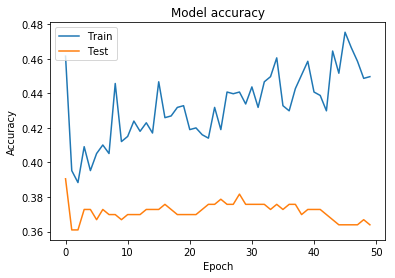

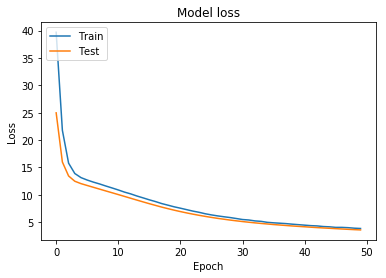

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 225us/step - loss: 3.8144 - acc: 0.4496 - val_loss: 3.5218 - val_acc: 0.3669
Epoch 2/50
1012/1012 [==============================] - 0s 209us/step - loss: 3.7422 - acc: 0.4545 - val_loss: 3.4733 - val_acc: 0.3639
Epoch 3/50
1012/1012 [==============================] - 0s 199us/step - loss: 3.6479 - acc: 0.4526 - val_loss: 3.4140 - val_acc: 0.3698
Epoch 4/50
1012/1012 [==============================] - 0s 191us/step - loss: 3.6206 - acc: 0.4348 - val_loss: 3.3587 - val_acc: 0.3757
Epoch 5/50
1012/1012 [==============================] - 0s 197us/step - loss: 3.6234 - acc: 0.4575 - val_loss: 3.3062 - val_acc: 0.3757
Epoch 6/50
1012/1012 [==============================] - 0s 200us/step - loss: 3.5336 - acc: 0.4822 - val_loss: 3.2594 - val_acc: 0.3757
Epoch 7/50
1012/1012 [==============================] - 0s 198us/step - loss: 3.4620 - acc: 0.4763 - val_loss: 3.2096 - val_acc: 0.3757
E

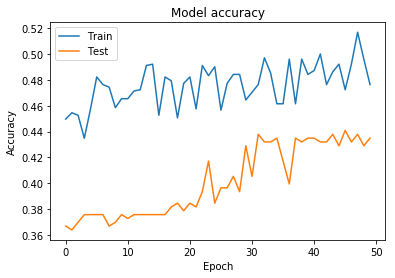

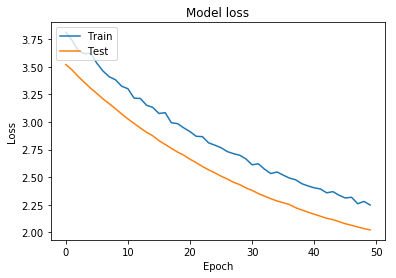

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 218us/step - loss: 2.2479 - acc: 0.4832 - val_loss: 2.0085 - val_acc: 0.4231
Epoch 2/50
1012/1012 [==============================] - 0s 196us/step - loss: 2.2142 - acc: 0.4733 - val_loss: 1.9908 - val_acc: 0.4615
Epoch 3/50
1012/1012 [==============================] - 0s 195us/step - loss: 2.1945 - acc: 0.4931 - val_loss: 1.9763 - val_acc: 0.4320
Epoch 4/50
1012/1012 [==============================] - 0s 202us/step - loss: 2.1812 - acc: 0.4911 - val_loss: 1.9609 - val_acc: 0.4379
Epoch 5/50
1012/1012 [==============================] - 0s 206us/step - loss: 2.1621 - acc: 0.4881 - val_loss: 1.9586 - val_acc: 0.4142
Epoch 6/50
1012/1012 [==============================] - 0s 193us/step - loss: 2.1805 - acc: 0.5128 - val_loss: 1.9454 - val_acc: 0.4260
Epoch 7/50
1012/1012 [==============================] - 0s 198us/step - loss: 2.1279 - acc: 0.4733 - val_loss: 1.9295 - val_acc: 0.4349
E

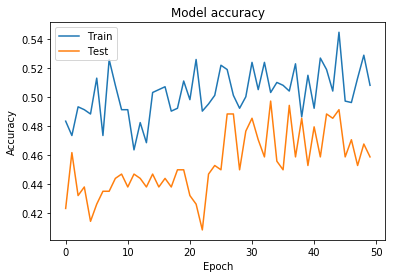

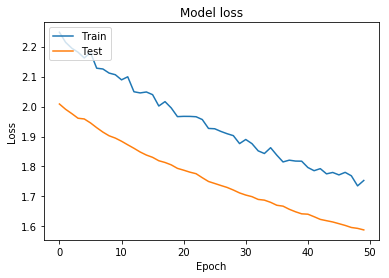

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 232us/step - loss: 1.7260 - acc: 0.4970 - val_loss: 1.5800 - val_acc: 0.4734
Epoch 2/50
1012/1012 [==============================] - 0s 228us/step - loss: 1.7357 - acc: 0.4872 - val_loss: 1.5742 - val_acc: 0.4645
Epoch 3/50
1012/1012 [==============================] - 0s 232us/step - loss: 1.7342 - acc: 0.5306 - val_loss: 1.5708 - val_acc: 0.5030
Epoch 4/50
1012/1012 [==============================] - 0s 231us/step - loss: 1.7157 - acc: 0.5020 - val_loss: 1.5646 - val_acc: 0.5030
Epoch 5/50
1012/1012 [==============================] - 0s 205us/step - loss: 1.7072 - acc: 0.5020 - val_loss: 1.5607 - val_acc: 0.4645
Epoch 6/50
1012/1012 [==============================] - 0s 194us/step - loss: 1.6722 - acc: 0.5148 - val_loss: 1.5532 - val_acc: 0.5059
Epoch 7/50
1012/1012 [==============================] - 0s 198us/step - loss: 1.7096 - acc: 0.5227 - val_loss: 1.5449 - val_acc: 0.5059
E

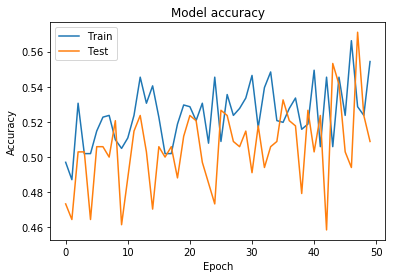

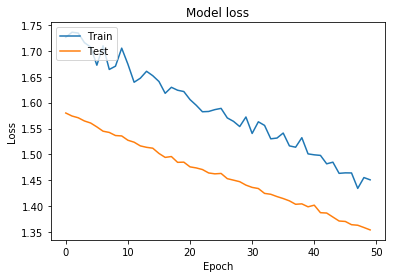

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 201us/step - loss: 1.4493 - acc: 0.5287 - val_loss: 1.3491 - val_acc: 0.5237
Epoch 2/50
1012/1012 [==============================] - 0s 201us/step - loss: 1.4309 - acc: 0.5346 - val_loss: 1.3456 - val_acc: 0.5148
Epoch 3/50
1012/1012 [==============================] - 0s 198us/step - loss: 1.4397 - acc: 0.5287 - val_loss: 1.3454 - val_acc: 0.5030
Epoch 4/50
1012/1012 [==============================] - 0s 190us/step - loss: 1.4410 - acc: 0.5198 - val_loss: 1.3398 - val_acc: 0.5178
Epoch 5/50
1012/1012 [==============================] - 0s 194us/step - loss: 1.4269 - acc: 0.5208 - val_loss: 1.3355 - val_acc: 0.5385
Epoch 6/50
1012/1012 [==============================] - 0s 201us/step - loss: 1.4176 - acc: 0.5119 - val_loss: 1.3293 - val_acc: 0.5296
Epoch 7/50
1012/1012 [==============================] - 0s 198us/step - loss: 1.4078 - acc: 0.5543 - val_loss: 1.3255 - val_acc: 0.5296
E

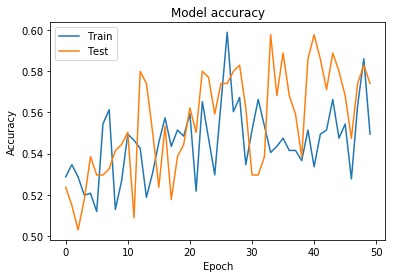

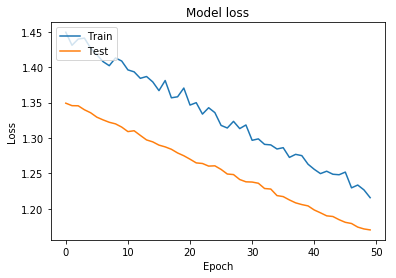

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 243us/step - loss: 1.2366 - acc: 0.5662 - val_loss: 1.1664 - val_acc: 0.5828
Epoch 2/50
1012/1012 [==============================] - 0s 236us/step - loss: 1.2138 - acc: 0.5652 - val_loss: 1.1625 - val_acc: 0.5799
Epoch 3/50
1012/1012 [==============================] - 0s 224us/step - loss: 1.2156 - acc: 0.5721 - val_loss: 1.1594 - val_acc: 0.5828
Epoch 4/50
1012/1012 [==============================] - 0s 224us/step - loss: 1.2145 - acc: 0.5405 - val_loss: 1.1570 - val_acc: 0.5592
Epoch 5/50
1012/1012 [==============================] - 0s 216us/step - loss: 1.1989 - acc: 0.5721 - val_loss: 1.1529 - val_acc: 0.5799
Epoch 6/50
1012/1012 [==============================] - 0s 228us/step - loss: 1.2050 - acc: 0.5484 - val_loss: 1.1494 - val_acc: 0.5799
Epoch 7/50
1012/1012 [==============================] - 0s 217us/step - loss: 1.1934 - acc: 0.5445 - val_loss: 1.1453 - val_acc: 0.5828
E

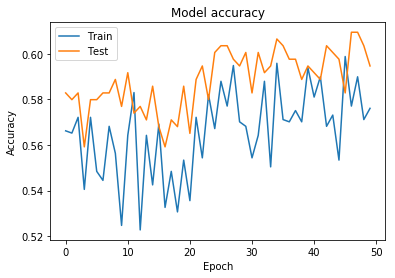

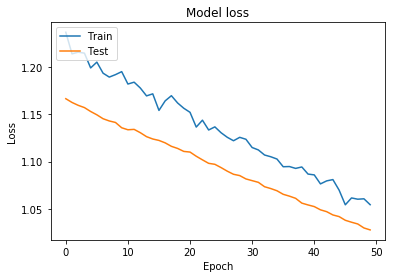

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 210us/step - loss: 1.0532 - acc: 0.5702 - val_loss: 1.0243 - val_acc: 0.6095
Epoch 2/50
1012/1012 [==============================] - 0s 198us/step - loss: 1.0483 - acc: 0.6028 - val_loss: 1.0214 - val_acc: 0.6154
Epoch 3/50
1012/1012 [==============================] - 0s 204us/step - loss: 1.0438 - acc: 0.5751 - val_loss: 1.0187 - val_acc: 0.6154
Epoch 4/50
1012/1012 [==============================] - 0s 209us/step - loss: 1.0356 - acc: 0.5662 - val_loss: 1.0150 - val_acc: 0.6095
Epoch 5/50
1012/1012 [==============================] - 0s 197us/step - loss: 1.0400 - acc: 0.5721 - val_loss: 1.0152 - val_acc: 0.5917
Epoch 6/50
1012/1012 [==============================] - 0s 194us/step - loss: 1.0316 - acc: 0.5711 - val_loss: 1.0105 - val_acc: 0.6213
Epoch 7/50
1012/1012 [==============================] - 0s 197us/step - loss: 1.0298 - acc: 0.5672 - val_loss: 1.0078 - val_acc: 0.6302
E

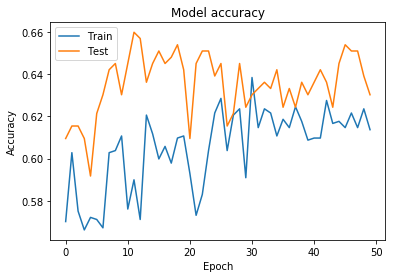

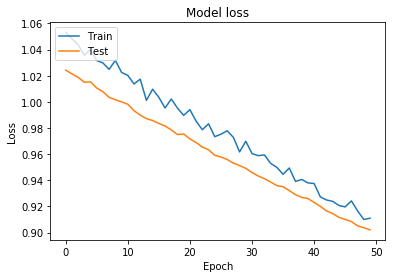

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 217us/step - loss: 0.9100 - acc: 0.6324 - val_loss: 0.8995 - val_acc: 0.6420
Epoch 2/50
1012/1012 [==============================] - 0s 207us/step - loss: 0.9067 - acc: 0.6196 - val_loss: 0.8983 - val_acc: 0.6391
Epoch 3/50
1012/1012 [==============================] - 0s 197us/step - loss: 0.9088 - acc: 0.6067 - val_loss: 0.8970 - val_acc: 0.6420
Epoch 4/50
1012/1012 [==============================] - 0s 195us/step - loss: 0.9027 - acc: 0.6245 - val_loss: 0.8941 - val_acc: 0.6272
Epoch 5/50
1012/1012 [==============================] - 0s 213us/step - loss: 0.9020 - acc: 0.6057 - val_loss: 0.8920 - val_acc: 0.6302
Epoch 6/50
1012/1012 [==============================] - 0s 197us/step - loss: 0.8959 - acc: 0.6077 - val_loss: 0.8896 - val_acc: 0.6361
Epoch 7/50
1012/1012 [==============================] - 0s 193us/step - loss: 0.8963 - acc: 0.6334 - val_loss: 0.8892 - val_acc: 0.6420
E

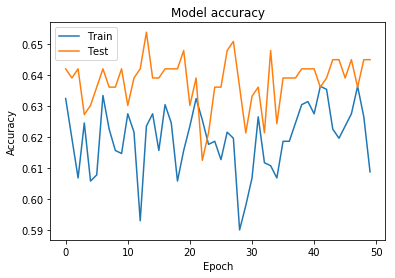

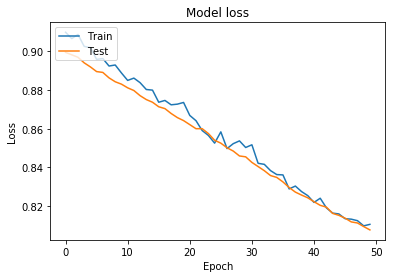

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 215us/step - loss: 0.8078 - acc: 0.6324 - val_loss: 0.8068 - val_acc: 0.6420
Epoch 2/50
1012/1012 [==============================] - 0s 194us/step - loss: 0.8076 - acc: 0.6255 - val_loss: 0.8063 - val_acc: 0.6243
Epoch 3/50
1012/1012 [==============================] - 0s 202us/step - loss: 0.8037 - acc: 0.6166 - val_loss: 0.8039 - val_acc: 0.6213
Epoch 4/50
1012/1012 [==============================] - 0s 196us/step - loss: 0.7971 - acc: 0.6403 - val_loss: 0.8020 - val_acc: 0.6391
Epoch 5/50
1012/1012 [==============================] - 0s 200us/step - loss: 0.7981 - acc: 0.6107 - val_loss: 0.8012 - val_acc: 0.6361
Epoch 6/50
1012/1012 [==============================] - 0s 202us/step - loss: 0.8013 - acc: 0.6206 - val_loss: 0.7986 - val_acc: 0.6302
Epoch 7/50
1012/1012 [==============================] - 0s 194us/step - loss: 0.7981 - acc: 0.6166 - val_loss: 0.7972 - val_acc: 0.6450
E

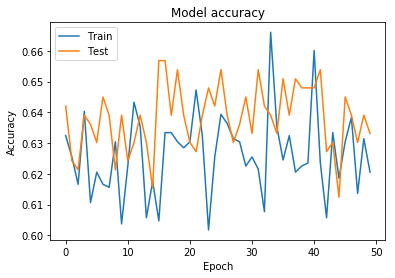

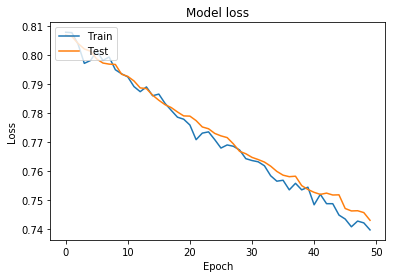

Train on 1012 samples, validate on 338 samples
Epoch 1/50
1012/1012 [==============================] - 0s 208us/step - loss: 0.7406 - acc: 0.6354 - val_loss: 0.7437 - val_acc: 0.6124
Epoch 2/50
1012/1012 [==============================] - 0s 200us/step - loss: 0.7390 - acc: 0.6275 - val_loss: 0.7400 - val_acc: 0.6627
Epoch 3/50
1012/1012 [==============================] - 0s 194us/step - loss: 0.7352 - acc: 0.6453 - val_loss: 0.7384 - val_acc: 0.6479
Epoch 4/50
1012/1012 [==============================] - 0s 197us/step - loss: 0.7351 - acc: 0.6423 - val_loss: 0.7385 - val_acc: 0.6243
Epoch 5/50
1012/1012 [==============================] - 0s 195us/step - loss: 0.7331 - acc: 0.6512 - val_loss: 0.7375 - val_acc: 0.6420
Epoch 6/50
1012/1012 [==============================] - 0s 197us/step - loss: 0.7361 - acc: 0.6354 - val_loss: 0.7372 - val_acc: 0.6568
Epoch 7/50
1012/1012 [==============================] - 0s 203us/step - loss: 0.7290 - acc: 0.6374 - val_loss: 0.7360 - val_acc: 0.6361
E

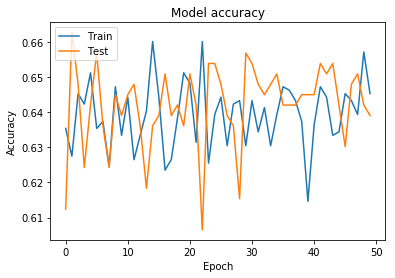

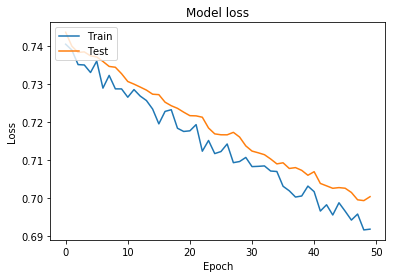

In [21]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', 
                              factor = 0.5,
                              patience = 1, min_lr = 0.0001)
#n_epochs = [100, 80, 60, 40, 20]
class_weights = {0:0.75, 1:1.0}
for i in range(10):    
    history = model.fit(x_train, y_train, 
          validation_split = 0.25, 
          batch_size = 20, 
          epochs = 50,
          verbose = 1,
          callbacks = [reduce_lr],
          class_weight = class_weights)
    stats_avg(history, i = 50)
    plots(history)
    

# Testing and evaluating the model

In [0]:
y_pred = model.predict(x_test)
y_pred = (y_pred >= 0.5)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, y_pred))
conf_matrix

Accuracy: 0.6690909090909091


,Predicted: 0,Predicted: 1
Actual:0,123,52
Actual:1,39,61


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       175
           1       0.54      0.61      0.57       100

    accuracy                           0.67       275
   macro avg       0.65      0.66      0.65       275
weighted avg       0.68      0.67      0.67       275



In [0]:
from sklearn.model_selection import train_test_split
xt, xv, yt, yv = train_test_split(attrib, lab, test_size = 0.2, random_state = 0)

In [0]:
y_pred = model.predict(xv)
y_pred = (y_pred >= 0.5)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(yv, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(yv, y_pred))
conf_matrix

Accuracy: 0.6804245283018868


,Predicted: 0,Predicted: 1
Actual:0,514,208
Actual:1,63,63


In [28]:
from sklearn.metrics import classification_report
print(classification_report(yv, y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       722
           1       0.23      0.50      0.32       126

    accuracy                           0.68       848
   macro avg       0.56      0.61      0.55       848
weighted avg       0.79      0.68      0.72       848

